<a href="https://colab.research.google.com/github/Mahdi-Saadati/Advanced-Machine-Learning-and-Deep-Neural-Networks/blob/main/7.d.%20Gated%20Recurrent%20Unit%20(GRU).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

 شبکه‌های واحد بازگشتی دروازه ای GRU (Gated Recurrent Unit)

📌 مشکل شبکه‌های عصبی ساده:

وقتی داده توالی‌دار باشه (مثل سیگنال ECG، متن، صدا یا ویدئو)، ما باید بدونیم "گذشته" چی بوده.
شبکه‌های معمولی (Dense) حافظه ندارن، یعنی فقط همون لحظه رو می‌بینن.

📌 راه‌حل → شبکه‌های بازگشتی (RNN):

RNNها مثل یک "نوار حافظه" هستن: هر لحظه، علاوه‌بر ورودی جدید، خلاصه‌ای از گذشته رو هم نگه می‌دارن.
ولی RNN ساده یک مشکل داشت: وقتی گذشته خیلی طولانی بشه (مثلاً چند ثانیه یا چند کلمه قبل)، دیگه خوب یادش نمی‌مونه → به این می‌گن مشکل فراموشی یا گرادیان محو.

📌 GRU وارد می‌شود:

GRU یک نوع RNN هوشمندتره که با استفاده از دروازه‌ها (Gate) تصمیم می‌گیره چه چیزهایی رو یادش بمونه و چه چیزهایی رو فراموش کنه.

مثل آدمی که یک داستان طولانی می‌شنوه:

چیزای مهم رو نگه می‌داره.

چیزای غیرمهم رو سریع فراموش می‌کنه.

🛠️ اجزای GRU:

Update Gate (دروازه به‌روزرسانی):
تصمیم می‌گیره چقدر از گذشته نگه داریم و چقدر رو با اطلاعات جدید جایگزین کنیم.

Reset Gate (دروازه بازنشانی):
تصمیم می‌گیره چقدر از حافظه قبلی رو پاک کنیم وقتی اطلاعات جدید وارد می‌شه.

Hidden State (حافظه):
مثل دفترچه‌ایه که خلاصه‌ی مهم‌ترین چیزهای گذشته رو نگه می‌داره.

📌 خیلی ساده اگر بخوای:

RNN ساده = حافظه کوتاه مدت.

LSTM = حافظه قوی ولی کمی پیچیده‌تر.

GRU = هم حافظه قویه و هم ساده‌تر از LSTM.

🎯 کجا استفاده می‌شه؟

پیش‌بینی ECG یا سیگنال‌های پزشکی.

ترجمه متن (یاد گرفتن وابستگی بین کلمات).

تحلیل صدا و گفتار.

پیش‌بینی سری‌های زمانی (دما، بورس، ترافیک و …).

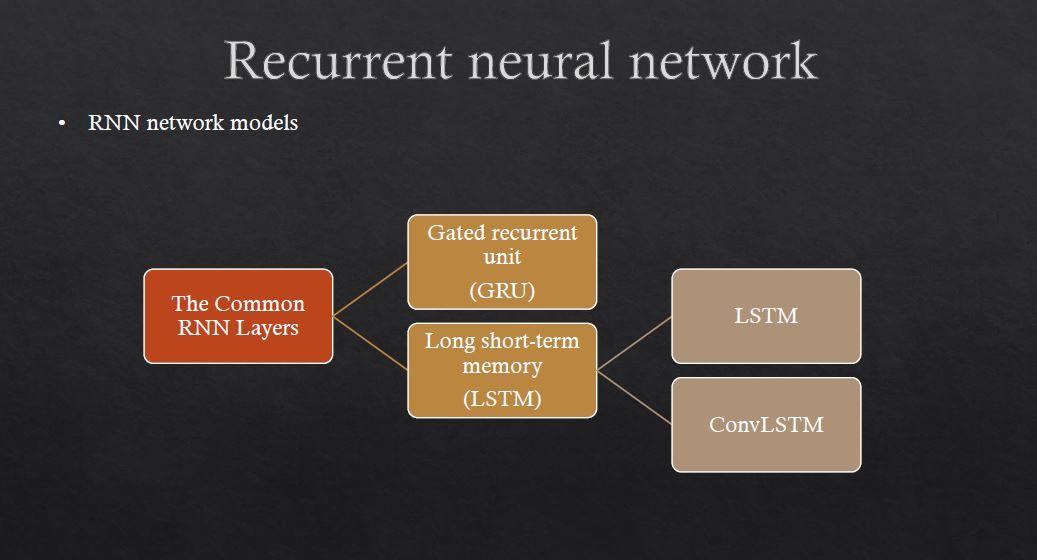

<div dir="rtl" align="right">

مثال
پیشبینی سیگنال های قلبی

یکی از معروف‌ترین دیتاست‌ها در حوزه پزشکی ECG (سیگنال قلب) هست.

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1214/1214 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0041 - val_loss: 9.6983e-05
Epoch 2/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.1780e-04 - val_loss: 4.4176e-05
Epoch 3/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 7.1732e-05 - val_loss: 3.1383e-05
Epoch 4/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 4.9392e-05 - val_loss: 2.6759e-05
Epoch 5/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 3.8508e-05 - val_loss: 1.7752e-05
Epoch 6/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 2.6816e-05 - val_loss: 1.4062e-05
Epoch 7/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 2.1909e-05 - val_loss: 1.2838e-05
Epoch 8/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.9848e-05 - val_loss: 1.1770e-05
Epoch 9/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 1.9397e-05 - val_loss: 1.5671e-05
Epoch 10/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 1.9654e-05 - val_loss: 1.8064e-05
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


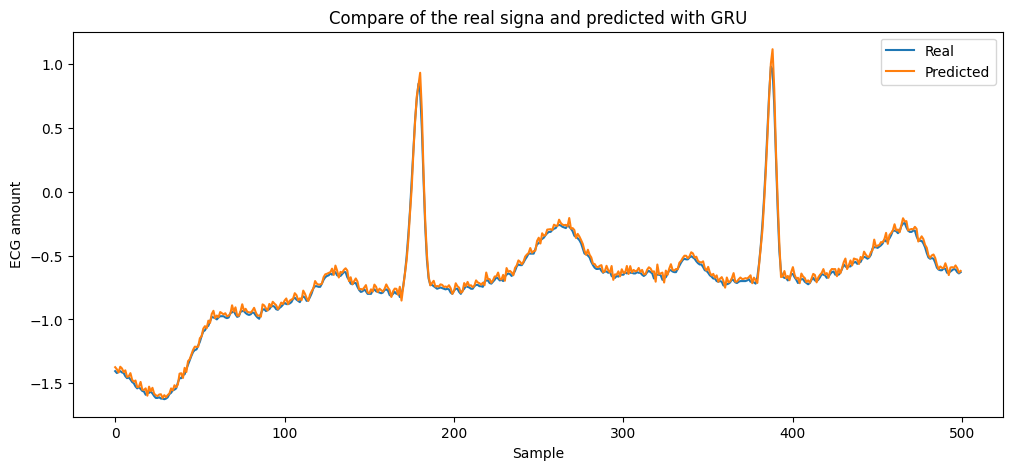

In [3]:
# وارد کردن کتابخانه‌ها
import numpy as np                           # محاسبات عددی با آرایه‌ها
import matplotlib.pyplot as plt              # برای رسم نمودارها
from sklearn.preprocessing import MinMaxScaler  # برای مقیاس‌دهی داده‌ها بین 0 و 1
from keras.models import Sequential  # مدل ترتیبی Keras
from keras.layers import GRU, Dense   # لایهٔ GRU و لایهٔ خروجی متراکم
from scipy import datasets                    # برای بارگذاری دیتاست آمادهٔ ECG

# 1) بارگذاری دیتاست ECG از SciPy (یک سیگنال طولانی یک‌بعدی)
ecg = datasets.electrocardiogram()            # بارگذاری آرایهٔ ۱بعدی سیگنال ECG
# ecg الان یک ndarray با طول زیاد است (نمونه‌های پی‌درپی سیگنال)

# 2) تبدیل سیگنال به شکل ستونی و نرمال‌سازی بین 0 و 1
signal = ecg.reshape(-1, 1)                   # تبدیل به (N,1) تا با scaler سازگار شود
scaler = MinMaxScaler()                       # ساخت یک MinMaxScaler
signal_scaled = scaler.fit_transform(signal)  # مقیاس‌دهی مقادیر به بازه [0,1]

# 3) تابع کمکی برای ساخت توالی‌های ورودی و هدف (X و y)
def create_sequences(data, seq_length=100):
    X, y = [], []                             # لیست خالی برای ذخیره توالی‌ها و اهداف
    for i in range(len(data) - seq_length):
        X.append(data[i : i + seq_length])    # هر نمونه: seq_length مقدار پی‌درپی (ورودی)
        y.append(data[i + seq_length])        # هدف: مقدار بعد از آن توالی (یک قدم جلوتر)
    return np.array(X), np.array(y)           # بازگشت به صورت آرایهٔ numpy

SEQ_LEN = 100                                  # طول هر توالی (مثلاً 100 نمونه گذشته)
X, y = create_sequences(signal_scaled, SEQ_LEN) # ساخت مجموعهٔ توالی‌ها و اهداف

# 4) شکل‌دهی X برای ورودی GRU: [نمونه‌ها, زمان, ویژگی]
# هر بردار زمانی یک ویژگی دارد (مقدار سیگنال)، پس ویژگی=1
X = X.reshape(X.shape[0], SEQ_LEN, 1)          # تبدیل به شکل (N_samples, SEQ_LEN, 1)

# 5) تقسیم داده به بخش آموزش و تست (مثلاً 80% آموزش، 20% تست)
split = int(len(X) * 0.8)                      # ایندکس جداسازی
X_train, X_test = X[:split], X[split:]         # ورودی‌های آموزش و تست
y_train, y_test = y[:split], y[split:]         # اهداف آموزش و تست

# 6) ساخت مدل GRU ساده
model = Sequential([
    GRU(64, input_shape=(SEQ_LEN, 1)),         # لایهٔ GRU با 64 سلول؛ ورودی طول توالی و یک ویژگی
    Dense(1)                                   # لایهٔ خروجی تک نورون برای پیش‌بینی مقدار عددی بعدی
])
model.compile(optimizer="adam", loss="mse")    # کامپایل مدل با Adam و خطای میانگین مربعات

# 7) آموزش مدل
# history شامل اطلاعات خطا در هر اپوک است (برای رسم یا بررسی بعدی)
history = model.fit(X_train, y_train,
                    epochs=10,                # تعداد عبورها روی دادهٔ آموزش
                    batch_size=64,            # اندازه هر بچ در آموزش
                    validation_split=0.1,     # از دادهٔ آموزش 10% برای اعتبارسنجی جدا می‌شود
                    verbose=1)                # نمایش پروگرس خروجی

# 8) پیش‌بینی روی مجموعهٔ تست
y_pred = model.predict(X_test)                 # مدل مقدار نرمال‌شده پیش‌بینی را می‌دهد

# 9) بازگرداندن مقیاس به واحد اصلی برای مقایسه (undo scaling)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1,1))  # تبدیل پیش‌بینی‌ها به واحد اولیه
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))  # تبدیل اهداف واقعی به واحد اولیه

# 10) رسم مقایسهٔ بخش اول سیگنال واقعی و پیش‌بینی‌شده
plt.figure(figsize=(12,5))
plt.plot(y_test_rescaled[:500], label="Real")      # رسم ۵۰۰ نقطهٔ اول واقعی
plt.plot(y_pred_rescaled[:500], label="Predicted")# رسم ۵۰۰ نقطهٔ اول پیش‌بینی
plt.legend()
plt.title("Compare of the real signa and predicted with GRU")
plt.xlabel("Sample")
plt.ylabel("ECG amount")
plt.show()
